

# Dataset ini merupakan kumpulan data yang berisi informasi-informasi sebagai berikut:



1. Age: Usia responden.
2. Industry: Industri tempat responden bekerja.
3. Job title: Jabatan pekerjaan responden.
4. Extra_job_title: Jika jabatan pekerjaan memerlukan konteks tambahan, responden diminta untuk memberikan penjelasan di sini.
5. Annual_salary: Gaji tahunan responden. Jika responden bekerja paruh waktu atau per jam, diminta untuk memasukkan nilai yang setara dengan gaji tahunan jika bekerja 40 jam seminggu, 52 minggu setahun.
6. Annual_bonus: Besaran kompensasi tambahan monetaris yang diterima responden, jika ada (misalnya, bonus atau lembur dalam setahun rata-rata). Hanya termasuk kompensasi monetaris, bukan nilai manfaat lainnya.
7. Currency: Mata uang gaji responden.
8. Other_currency: Jika mata uangnya "lainnya", responden diminta untuk menentukan mata uangnya di sini.
9. Extra_income_info: Jika pendapatan responden memerlukan konteks tambahan, diminta untuk memberikannya di sini.
10. Work_country: Negara tempat responden bekerja.
11. Work_state_US: Jika responden berada di Amerika Serikat, negara bagian tempat mereka bekerja.
12. Work_city: Kota tempat responden bekerja.
13. Overall_experience_years: Jumlah tahun pengalaman kerja profesional secara keseluruhan yang dimiliki responden.
14. Field_experience_years: Jumlah tahun pengalaman kerja profesional dalam bidang pekerjaan responden.
15. Education_level: Tingkat pendidikan tertinggi yang telah diselesaikan oleh responden.
16. Gender: Jenis kelamin responden.
17. Race: Ras responden (Pilih semua yang berlaku).
18. Kolom yang Dihitung (Calculated Fields):
* New_overall_experience_years: Menggunakan batas bawah
kategori sebagai tahun pengalaman kerja keseluruhan.
* New_field_experience_years: Menggunakan batas bawah kategori sebagai tahun pengalaman kerja dalam bidang.
* Gender_new: Menggabungkan kategori jenis kelamin lainnya menjadi satu kategori sebagai 'lainnya'.
* Race_list: Mengkonversi nilai kolom ras menjadi daftar untuk menangani nilai ganda.
* White: Jika rasnya hanya putih.
* Cleaned_country: Kolom negara yang telah dibersihkan.
* work_state_new: Kolom negara bagian yang telah dibersihkan.
* annual_salary_fin: Gaji tahunan yang disatukan dalam satu mata uang, yaitu USD, berdasarkan nilai konversi.

# Kode untuk meng-import library yang **Dibutuhkan**

In [3]:
import numpy as np #library untuk operasi matematika
import pandas as pd #library untuk dataframe
import seaborn as sns #library untuk visualisasi
import matplotlib.pyplot as plt

In [10]:
# Read file Excel
df = pd.read_excel('salary_survey_2021.xlsx')

# Tampilkan DataFrame
df.head()


,Timestamp,How old are you?,What industry do you work in?,Job title,"If your job title needs additional context, please clarify here:","What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)","How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.",Please indicate the currency,"If ""Other,"" please indicate the currency here:","If your income needs additional context, please provide it here:",What country do you work in?,"If you're in the U.S., what state do you work in?",What city do you work in?,How many years of professional work experience do you have overall?,How many years of professional work experience do you have in your field?,What is your highest level of education completed?,What is your gender?,What is your race? (Choose all that apply.)
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [11]:
# Mengubah nama kolom menjadi lebih sederhana

df.rename(columns={
    'How old are you?':'age',
    'What industry do you work in?':'industry',
    'If your job title needs additional context, please clarify here:':'extra_job_title',
    "What is your annual salary? (You'll indicate the currency in a later question. If you are part-time or hourly, please enter an annualized equivalent -- what you would earn if you worked the job 40 hours a week, 52 weeks a year.)":'annual_salary',
    "How much additional monetary compensation do you get, if any (for example, bonuses or overtime in an average year)? Please only include monetary compensation here, not the value of benefits.":"annual_bonus",
    "Please indicate the currency":"currency",
    'If "Other," please indicate the currency here: ': 'other_currency',
    "If your income needs additional context, please provide it here:" : "extra_income_info",
    "What country do you work in?":"Work_country",
    "If you're in the U.S., what state do you work in?":"work_state_US",
    "What city do you work in?":'work_city',
    "How many years of professional work experience do you have overall?":'overall_experience_years',
    "How many years of professional work experience do you have in your field?":"field_experience_years",
    "What is your highest level of education completed?":"education_level",
    "What is your gender?":"gender",
    "What is your race? (Choose all that apply.)":"race"

}, inplace=True)

In [12]:
# Melihat ringkasan dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27946 entries, 0 to 27945
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Timestamp                 27946 non-null  datetime64[ns]
 1   age                       27946 non-null  object        
 2   industry                  27874 non-null  object        
 3   Job title                 27946 non-null  object        
 4   extra_job_title           7233 non-null   object        
 5   annual_salary             27946 non-null  int64         
 6   annual_bonus              20690 non-null  float64       
 7   currency                  27946 non-null  object        
 8   other_currency            195 non-null    object        
 9   extra_income_info         3033 non-null   object        
 10  Work_country              27946 non-null  object        
 11  work_state_US             22964 non-null  object        
 12  work_city         

In [13]:
# Melihat tipe data

columns = df.keys()
for c in columns:
  print(c, type(df[c][0]))

Timestamp <class 'pandas._libs.tslibs.timestamps.Timestamp'>
age <class 'str'>
industry <class 'str'>
Job title <class 'str'>
extra_job_title <class 'float'>
annual_salary <class 'numpy.int64'>
annual_bonus <class 'numpy.float64'>
currency <class 'str'>
other_currency <class 'float'>
extra_income_info <class 'float'>
Work_country <class 'str'>
work_state_US <class 'str'>
work_city <class 'str'>
overall_experience_years <class 'str'>
field_experience_years <class 'str'>
education_level <class 'str'>
gender <class 'str'>
race <class 'str'>


In [14]:
# Mengubah tipe data Timestamp untuk kemudahan pengelolaan

df['Timestamp'] = pd.to_datetime(df['Timestamp'])

#### Kolom Industri

In [15]:
# Cek data kosong pada kolom industri

df.industry.isnull().sum()

72

In [ ]:
# Membuat Series dari array data unik dan memberikan nama kolom 'unique_industry'
unique_industries_column = pd.Series(df.industry.unique(), name='unique_industry')

# Melihat jumlah kemunculan setiap nilai unik dalam kolom "unique_industry"
count_unique_industries = unique_industries_column.value_counts()

# Menampilkan hasil count
print(count_unique_industries)

Education (Higher Education)        1
Religious (synagogue)               1
Diagnostic Medical Devices          1
Library at a University             1
Energy/oil                          1
                                   ..
student paid intern in computing    1
mental health                       1
Pet                                 1
Mental health                       1
Fast food                           1
Name: unique_industry, Length: 1209, dtype: int64


In [ ]:
# Menghitung jumlah kemunculan setiap nilai dalam kolom 'industry'
industry_counts = df['industry'].value_counts()

# Mendapatkan nilai-nilai unik yang hanya muncul sekali atau dua kali
single_occurrences = industry_counts[industry_counts < 100].index

# Mengganti nilai-nilai yang hanya muncul kurang dari 100 dengan "Other"
df.loc[df['industry'].isin(single_occurrences), 'industry'] = 'Other'

# Menampilkan jumlah kemunculan setelah penggantian dilakukan
print(df['industry'].value_counts())

Computing or Tech                       4674
Education (Higher Education)            2458
Nonprofits                              2417
Other                                   2300
Health care                             1888
Government and Public Administration    1882
Accounting, Banking & Finance           1792
Engineering or Manufacturing            1689
Marketing, Advertising & PR             1126
Law                                     1097
Business or Consulting                   849
Education (Primary/Secondary)            832
Media & Digital                          772
Insurance                                530
Retail                                   502
Recruitment or HR                        459
Property or Construction                 386
Utilities & Telecommunications           357
Art & Design                             355
Transport or Logistics                   303
Sales                                    285
Social Work                              273
Hospitalit

#### Kolom Gender

In [ ]:
df.gender.value_counts()

Woman                            21316
Man                               5429
Non-binary                         742
Other or prefer not to answer      291
Prefer not to answer                 1
Name: gender, dtype: int64

In [ ]:
# Membuat kolom "gender_new" yang hanya tediri dari "Man", "Women", dan "Other"

df["gender_new"] = df["gender"]

for x in df.gender_new.dropna():
    if x not in ["Man", "Woman"]:
        df["gender_new"] = df["gender_new"].replace({x: "Other"})

df.gender_new.value_counts()

Woman    21316
Man       5429
Other     1034
Name: gender_new, dtype: int64

In [ ]:
non_string_values = df[~df['gender_new'].apply(lambda x: isinstance(x, str))]
print(non_string_values)

                    Timestamp    age                              industry  \
171   2021-04-27 11:06:12.250  25-34  Government and Public Administration   
490   2021-04-27 11:10:42.858  25-34                  Hospitality & Events   
537   2021-04-27 11:11:24.045  25-34          Education (Higher Education)   
647   2021-04-27 11:13:01.276  35-44                       Media & Digital   
658   2021-04-27 11:13:13.913  25-34                            Nonprofits   
...                       ...    ...                                   ...   
27339 2021-10-26 16:06:25.991  35-44          Engineering or Manufacturing   
27587 2021-12-28 16:51:43.340  35-44         Education (Primary/Secondary)   
27730 2022-03-27 10:59:32.710  18-24                                   NaN   
27932 2023-02-01 07:53:38.039  45-54                                   Law   
27942 2023-03-01 09:43:37.098  45-54              Property or Construction   

                           Job title  \
171                  Pr

In [ ]:
# Mengganti nilai NaN di kolom 'gender' dengan 'Others'
df['gender_new'] = df['gender_new'].fillna('Other')

#### Kolom Currency


In [ ]:
df.currency.unique()

array(['USD', 'GBP', 'CAD', 'EUR', 'AUD/NZD', 'Other', 'CHF', 'ZAR',
       'SEK', 'HKD', 'JPY'], dtype=object)

In [ ]:
df.groupby('currency').currency.count()

currency
AUD/NZD      500
CAD         1665
CHF           37
EUR          637
GBP         1585
HKD            4
JPY           23
Other        156
SEK           37
USD        23288
ZAR           14
Name: currency, dtype: int64

In [ ]:
df.loc[df.currency =='Other', ['currency', 'other_currency', 'Work_country']]

,currency,other_currency,Work_country
434,Other,INR,India
603,Other,Peso Argentino,Argentina
1311,Other,MYR,Malaysia
1840,Other,CHF,Switzerland
1924,Other,NOK,Norway
...,...,...,...
27857,Other,INR,India
27897,Other,SGD,Singapore
27902,Other,COP,Colombia
27917,Other,SGD,Singapore


In [ ]:
# Filter baris berdasarkan kondisi bahwa currency adalah 'Other', kemudian ambil kolom 'other_currency'
other_currency_counts = df.loc[df.currency =='Other', 'other_currency'].value_counts()

# Menampilkan jumlah nilai unik dari other_currency
print(other_currency_counts)

INR                      10
SGD                       9
MYR                       8
NOK                       8
USD                       8
                         ..
LKR                       1
Polish Złoty              1
Philippine peso (PHP)     1
Australian Dollars        1
COP                       1
Name: other_currency, Length: 83, dtype: int64


In [ ]:
# Membuat DataFrame baru yang tidak termasuk baris dengan nilai 'Other' di kolom 'currency'
df = df[df['currency'] != 'Other']

# Menampilkan DataFrame setelah penghapusan
df.head()

,Timestamp,age,industry,Job title,extra_job_title,annual_salary,annual_bonus,currency,other_currency,extra_income_info,Work_country,work_state_US,work_city,overall_experience_years,field_experience_years,education_level,gender,race,gender_new
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,Woman
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White,Other
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,Woman
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,Woman
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,Woman


In [ ]:
# Data nilai tukar mata uang terhadap USD
# Data from Refinitiv per tanggal 24 Maret 2024 jam 23.51

exchange_rates = {
    'AUD': 1.53,
    'CAD': 1.36,
    'CHF': 0.9,
    'EUR': 0.93,
    'GBP': 0.79,
    'HKD': 7.82,
    'JPY': 151.42,
    'SEK': 10.56,
    'ZAR': 18.99
}

# Fungsi untuk mengonversi mata uang ke USD
def convert_to_usd(amount, currency):
    exchange_rate = exchange_rates.get(currency, 1)  # Jika mata uang tidak ada dalam dictionary, gunakan nilai 1
    return amount * exchange_rate

# Menambahkan kolom konversi ke USD
df['salary_usd'] = df.apply(lambda row: convert_to_usd(row['annual_salary'], row['currency']), axis=1)

# Menampilkan DataFrame dengan kolom konversi ke USD
df.head()


,Timestamp,age,industry,Job title,extra_job_title,annual_salary,annual_bonus,currency,other_currency,extra_income_info,Work_country,work_state_US,work_city,overall_experience_years,field_experience_years,education_level,gender,race,gender_new,salary_usd
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,Woman,55000.0
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White,Other,43134.0
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,Woman,34000.0
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,Woman,62000.0
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,Woman,60000.0


In [ ]:
df.describe()

,annual_salary,annual_bonus,salary_usd
count,2.779000e+04,2.058300e+04,2.779000e+04
mean,9.822059e+04,1.221510e+04,8.656886e+05
std,6.499120e+05,4.788904e+04,3.174282e+07
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,5.400000e+04,0.000000e+00,5.406525e+04
50%,7.500000e+04,2.000000e+03,7.700000e+04
75%,1.090000e+05,1.000000e+04,1.100000e+05
max,1.020000e+08,2.000000e+06,3.149536e+09


### Analisis

#### Industri yang memberikan gaji tertinggi dan terendah

In [ ]:
# Berdasarkan Median
df[["industry", "salary_usd"]].groupby("industry").median().sort_values(by="salary_usd",ascending=False)

,salary_usd
industry,
Computing or Tech,115000.0
Law,92500.0
Engineering or Manufacturing,90000.0
Business or Consulting,90000.0
Utilities & Telecommunications,84950.0
Government and Public Administration,80000.0
Health care,79000.0
"Accounting, Banking & Finance",78560.0
Insurance,76000.0


In [ ]:
# Berdasarkan Rata-rata
df[["industry", "salary_usd"]].groupby("industry").mean().sort_values(by="salary_usd",ascending=False)

,salary_usd
industry,
Entertainment,1.761486e+07
Retail,5.726240e+06
"Marketing, Advertising & PR",2.414061e+06
Utilities & Telecommunications,2.289245e+06
Recruitment or HR,1.939633e+06
Computing or Tech,1.182001e+06
Education (Higher Education),9.833771e+05
Engineering or Manufacturing,8.322259e+05
Education (Primary/Secondary),8.053485e+05


In [ ]:
# Menghitung kuartil pertama (Q1)
Q1 = df['salary_usd'].quantile(0.25)

# Menghitung kuartil ketiga (Q3)
Q3 = df['salary_usd'].quantile(0.75)

# Menghitung IQR
IQR = Q3 - Q1

# Menentukan batas bawah dan batas atas untuk outlier
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Membuat mask untuk menentukan baris-baris yang bukan outlier
mask = (df['salary_usd'] >= lower_bound) & (df['salary_usd'] <= upper_bound)

# Memilih baris-baris yang bukan outlier dan membuat DataFrame baru tanpa outlier
df_new = df[mask]

# Menampilkan DataFrame baru tanpa outlier
df_new.head()


,Timestamp,age,industry,Job title,extra_job_title,annual_salary,annual_bonus,currency,other_currency,extra_income_info,Work_country,work_state_US,work_city,overall_experience_years,field_experience_years,education_level,gender,race,gender_new,salary_usd
0,2021-04-27 11:02:09.743,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,Woman,55000.0
1,2021-04-27 11:02:21.562,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White,Other,43134.0
2,2021-04-27 11:02:38.125,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,Woman,34000.0
3,2021-04-27 11:02:40.643,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,Woman,62000.0
4,2021-04-27 11:02:41.793,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,Woman,60000.0


In [ ]:
# Berdasarkan Rata-rata
df_new[["industry", "salary_usd"]].groupby("industry").mean().sort_values(by="salary_usd",ascending=False)

,salary_usd
industry,
Computing or Tech,107673.020452
Business or Consulting,93682.700572
Engineering or Manufacturing,91869.530384
Law,90856.265387
Utilities & Telecommunications,86063.833246
Government and Public Administration,83315.427688
"Marketing, Advertising & PR",81745.797378
"Accounting, Banking & Finance",81736.634014
Insurance,81668.998333


#### Pengaruh pengalaman terhadap Gaji

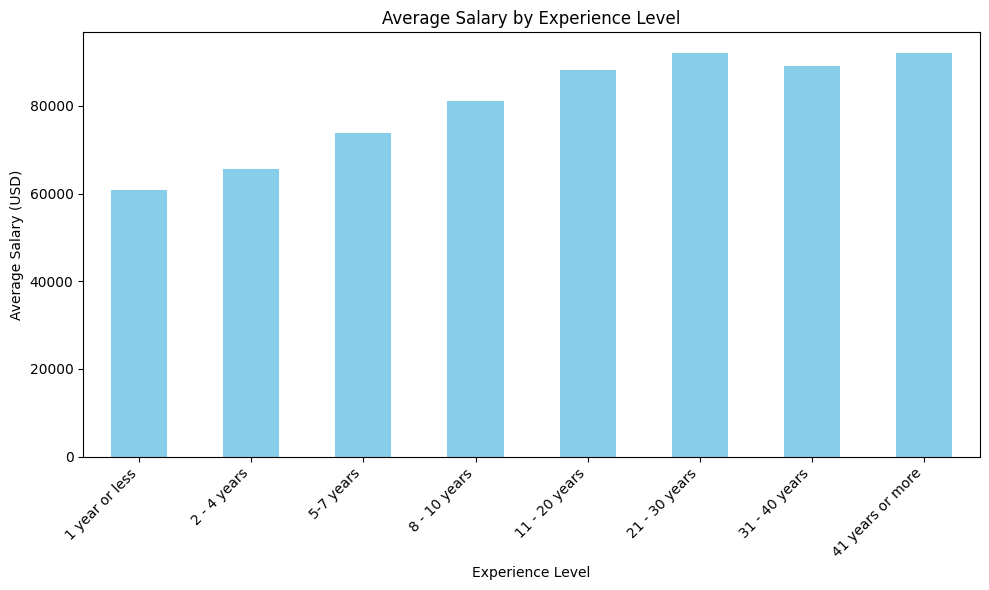

In [ ]:
# Mengatur urutan pengalaman
experience_order = [
    '1 year or less',
    '2 - 4 years',
    '5-7 years',
    '8 - 10 years',
    '11 - 20 years',
    '21 - 30 years',
    '31 - 40 years',
    '41 years or more'
]

# Menghitung rata-rata salary_usd untuk setiap tingkat pengalaman
salary_by_experience = df_new.groupby('overall_experience_years')['salary_usd'].mean().reindex(experience_order)

# Membuat bar chart
plt.figure(figsize=(10, 6))
salary_by_experience.plot(kind='bar', color='skyblue')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Experience Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

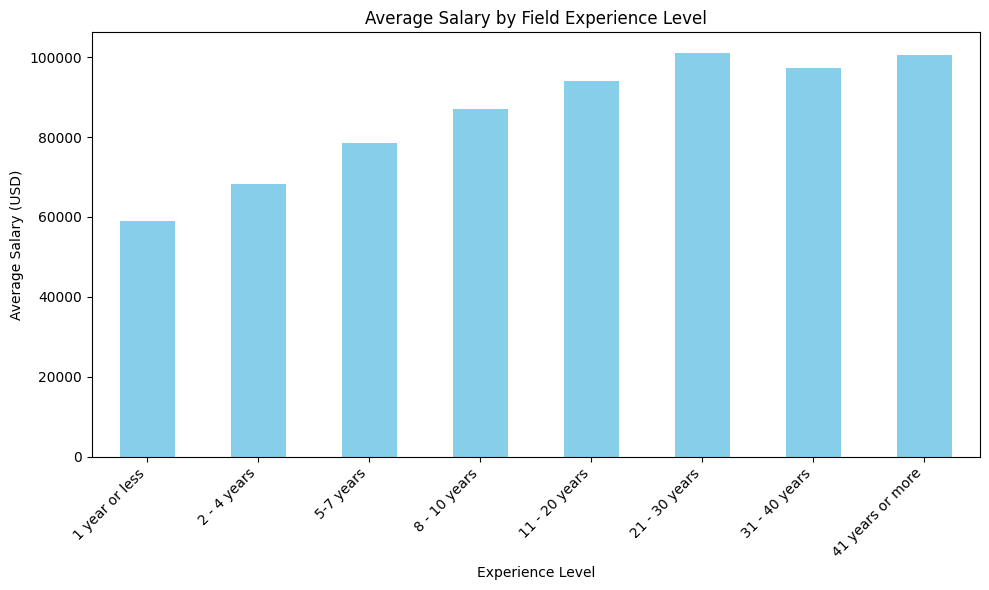

In [ ]:
# Menghitung rata-rata salary_usd untuk setiap tingkat pengelaman
salary_field_experience = df_new.groupby('field_experience_years')['salary_usd'].mean().reindex(experience_order)

# Membuat bar chart
plt.figure(figsize=(10, 6))
salary_field_experience.plot(kind='bar', color='skyblue')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Field Experience Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Pengaruh Jenis Kelamin terhadap Gaji

<Axes: title={'center': 'Gender Vs. Annual Salary'}, xlabel='Gender', ylabel='Salary'>

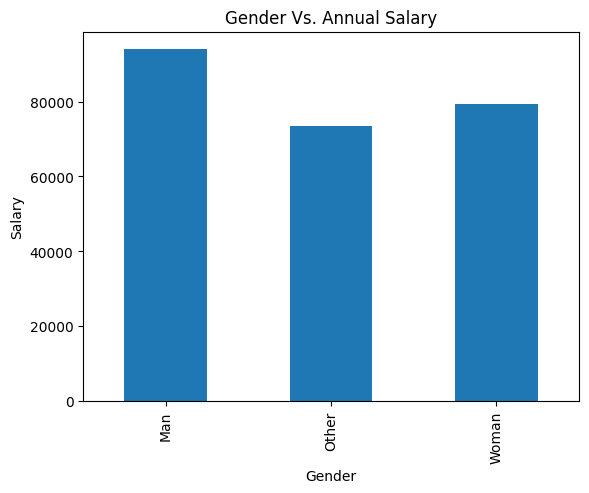

In [ ]:
df_new.groupby(['gender_new'])['salary_usd'].mean().sort_index().plot(kind="bar", title='Gender Vs. Annual Salary',xlabel='Gender',ylabel='Salary')


#### Pengaruh Level Pendidikan Terhadap Gaji

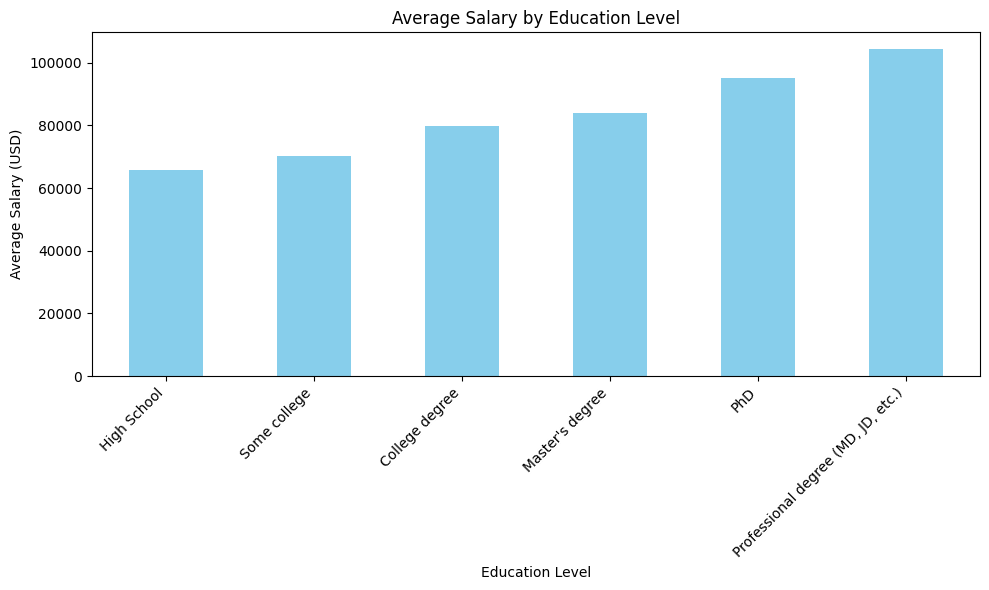

In [ ]:
# Mengatur urutan pendidikan
education_order = [
    'High School',
    'Some college',
    'College degree',
    "Master's degree",
    'PhD',
    "Professional degree (MD, JD, etc.)"
]

# Menghitung rata-rata salary_usd untuk setiap tingkat pendidikan
salary_by_education = df_new.groupby('education_level')['salary_usd'].mean().reindex(education_order)

# Membuat bar chart
plt.figure(figsize=(10, 6))
salary_by_education.plot(kind='bar', color='skyblue')
plt.xlabel('Education Level')
plt.ylabel('Average Salary (USD)')
plt.title('Average Salary by Education Level')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()